### Test T

__Parte 1__

- Descargue un dataset tabular de varias características para regresión.
- Ajuste un modelo lineal de varias características.
- Para cada parámetro calculé el error estándar.
- Grafique la Función de densidad de probabilidad (PDF) de cada parámetro en una sola gráfica (con un color diferente cada una) bajo el supuesto de que está distribuido de manera normal. Marque la media de cada PDF (valor del j-esimo) parámetro.

__Parte 2__

- Implemente el test T en sus versiones one-sided y two-sided (*).
- Genere una gráfica con la distribución T adecuada (grados de libertad) para el caso de prueba de la primera parte y grafique junto a ella los valores calculados para cada t de cada parámetro del modelo y su p-value. Marque en rojo aquellos valores de t para los que se acepta la hipótesis nula y en verde aquellos casos donde se rechaza.

### Dataset precio de viajes en __Uber__ dado el número de pasajeros, distancia y fecha

In [1]:
#importar uber.csv 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import f

In [2]:
#Importar el archivo
df = pd.read_csv('uber.csv')

In [3]:
df.head(3)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1


In [4]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.drop(['key'] , axis=1 , inplace=True)
df.head(3)


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1


Separar la columna de fecha y hora en dos columnas diferentes

In [5]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['pickup_date'] = df['pickup_datetime'].dt.date
df['pickup_time'] = df['pickup_datetime'].dt.time
df.drop(['pickup_datetime'] , axis=1 , inplace=True)
df.head(3)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_time
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07,19:52:06
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17,20:04:56
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24,21:45:00


Categoria de la hora del dia por mañana __(0)__ , tarde __(1)__ , noche __(2)__ y madrugada __(3)__.

In [6]:
df['pickup_time'] = df['pickup_time'].apply(lambda x: x.strftime('%H:%M:%S'))
df['pickup_time'] = pd.to_datetime(df['pickup_time'])


C:\Users\Adolfo\AppData\Local\Temp\ipykernel_1220\2015125847.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['pickup_time'] = pd.to_datetime(df['pickup_time'])


In [7]:
df['pickup_time'] = df['pickup_time'].dt.hour
df['pickup_time'] = df['pickup_time'].astype(int)
df['pickup_time'] = df['pickup_time'].astype(str)
df['pickup_time'] = df['pickup_time'].replace(['0','1','2','3','4','5','6'],'3')
df['pickup_time'] = df['pickup_time'].replace(['7', '8', '9', '10','11','12'],'0')
df['pickup_time'] = df['pickup_time'].replace(['13','14','15','16','17','18'],'1')
df['pickup_time'] = df['pickup_time'].replace(['19','20','21','22','23'],'2')

df.head(3)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_time
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07,2
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17,2
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24,2


In [8]:
exportar = df.to_csv('uber_revisado.csv')

In [9]:
import folium

# Tomar una muestra aleatoria de 100 puntos para la visualización
sample_df = df.sample(n=100, random_state=1)

# Inicializar el mapa en una ubicación central de la muestra
initial_coords = [sample_df['pickup_latitude'].mean(), sample_df['pickup_longitude'].mean()]
m = folium.Map(location=initial_coords, zoom_start=13)

# Agregar los puntos de recogida al mapa
for _, row in sample_df.iterrows():
    pickup_coords = [row['pickup_latitude'], row['pickup_longitude']]
    folium.CircleMarker(location=pickup_coords, radius=5, color='blue', fill=True, fill_color='blue').add_to(m)

# Guardar el mapa en un archivo HTML
map_file_path = 'uber_pickup_map.html'
m.save(map_file_path)

map_file_path

'uber_pickup_map.html'

In [10]:
import numpy as np

# Definición de la función para calcular la distancia haversina
def haversine_distance(lon1, lat1, lon2, lat2):
    # Radio de la Tierra en kilómetros
    R = 6371.0
    
    # Convertir coordenadas de grados a radianes
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    
    # Diferencia en las coordenadas
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    # Fórmula haversina
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
    # Distancia en kilómetros
    distance = R * c
    
    return distance

# Aplicar la función para calcular la distancia en el DataFrame
df['distancia'] = haversine_distance(df['pickup_longitude'], df['pickup_latitude'],
                                     df['dropoff_longitude'], df['dropoff_latitude'])

# Mostrar las primeras filas del DataFrame con la nueva columna 'distancia'
df.head()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_time,distancia
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07,2,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17,2,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24,2,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26,0,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28,1,4.475450


Crear un dataframe llamado dataframe con las columnas fare_amount , passenger_count , pickup_date , pickup_time y distancia

In [11]:
dataframe = df[['fare_amount','passenger_count','pickup_date','pickup_time','distancia']]
dataframe.head(3)

,fare_amount,passenger_count,pickup_date,pickup_time,distancia
0,7.5,1,2015-05-07,2,1.683323
1,7.7,1,2009-07-17,2,2.457590
2,12.9,1,2009-08-24,2,5.036377


In [12]:
#convertir la columna pickup_date a tipo numérico y pickup_time a tipo numérico

dataframe['pickup_time'] = dataframe['pickup_time'].astype(int)


C:\Users\Adolfo\AppData\Local\Temp\ipykernel_1220\2036497375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['pickup_time'] = dataframe['pickup_time'].astype(int)


In [13]:
#convertir la columna pickup_date a tipo numérico
dataframe['pickup_date'] = pd.to_datetime(dataframe['pickup_date'])
dataframe['pickup_date'] = dataframe['pickup_date'].dt.strftime('%Y%m%d')
dataframe['pickup_date'] = dataframe['pickup_date'].astype(int)

C:\Users\Adolfo\AppData\Local\Temp\ipykernel_1220\3858617476.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['pickup_date'] = pd.to_datetime(dataframe['pickup_date'])
C:\Users\Adolfo\AppData\Local\Temp\ipykernel_1220\3858617476.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['pickup_date'] = dataframe['pickup_date'].dt.strftime('%Y%m%d')
C:\Users\Adolfo\AppData\Local\Temp\ipykernel_1220\3858617476.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [14]:
dataframe.describe()

,fare_amount,passenger_count,pickup_date,pickup_time,distancia
count,200000.000000,200000.000000,2.000000e+05,200000.000000,199999.000000
mean,11.359955,1.684535,2.011807e+07,1.312505,20.855350
std,9.901776,1.385997,1.852717e+04,1.026261,382.964642
min,-52.000000,0.000000,2.009010e+07,0.000000,0.000000
25%,6.000000,1.000000,2.010082e+07,0.000000,1.215222
50%,8.500000,1.000000,2.012032e+07,1.000000,2.120992
75%,12.500000,2.000000,2.013102e+07,2.000000,3.875169
max,499.000000,208.000000,2.015063e+07,3.000000,16409.239135


In [15]:

print(len(dataframe))

200000


In [16]:
#eliminar los valores atípicos de la columna fare_amount , distancia , pickup_date,pickup_time passenger_count por medio de la desviación estándar
dataframe = dataframe[np.abs(dataframe['fare_amount']-dataframe['fare_amount'].mean())<=(3*dataframe['fare_amount'].std())]
dataframe = dataframe[np.abs(dataframe['distancia']-dataframe['distancia'].mean())<=(3*dataframe['distancia'].std())]
dataframe = dataframe[np.abs(dataframe['passenger_count']-dataframe['passenger_count'].mean())<=(3*dataframe['passenger_count'].std())]
dataframe = dataframe[np.abs(dataframe['pickup_time']-dataframe['pickup_time'].mean())<=(3*dataframe['pickup_time'].std())]



dataframe.describe()

,fare_amount,passenger_count,pickup_date,pickup_time,distancia
count,190045.000000,190045.000000,1.900450e+05,190045.000000,190045.000000
mean,10.154345,1.588182,2.011764e+07,1.314815,2.940031
std,6.411927,1.153295,1.851001e+04,1.026757,4.884725
min,-10.900000,0.000000,2.009010e+07,0.000000,0.000000
25%,6.000000,1.000000,2.010081e+07,0.000000,1.199731
50%,8.100000,1.000000,2.012022e+07,1.000000,2.068624
75%,12.100000,2.000000,2.013100e+07,2.000000,3.665261
max,41.040000,5.000000,2.015063e+07,3.000000,973.369304


In [17]:

print(len(dataframe))

190045


In [18]:
X = dataframe[["passenger_count","pickup_time","distancia"]]
y = dataframe["fare_amount"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Escalado estandar

In [20]:
scaler = preprocessing.StandardScaler().fit(X_train) 
X_train_scaled = scaler.transform(X_train)

Ajusta los estimadores del modelo lineal.

In [21]:
# Function to get estimators.
def fit_linear_model(X, y):
    """
        Fitting the estimators of linear model.
        Arguments:
            X: a list of values.
            y: a list of values.
        Return:
            estimators: a list with b_1_est and b_0_est.
    """
    # Creation of ones array.
    ones_array = np.ones(X.shape[1])
    # Concatenation of arrays.
    X = np.hstack([X, np.ones((X.shape[0], 1))])
    # Fitting estimators.
    estimators = np.linalg.lstsq(X, y, rcond=None)[0]
    
    return estimators

In [22]:
# Function to implement a linear model.
def linear_model(X, estimators):
    """
        Implementation of linear model.
        Arguments:
            X: a list of values.
            estimators: a list of b.
        Returns:
            y: a list of values.
    """
    # Creation of ones array.
    ones_array = np.ones((len(X), 1))
    # Concatenation of arrays.
    X = np.hstack((X, ones_array))
    # Generation of y.
    y = np.dot(X, estimators)
    
    return y

In [23]:
# Function to get some model metrics.
def model_metrics(X, y):
    """
        Getting some metrics from any model.
        Arguments:
            X: a list of features.
            y: a list of labels.
        Return:
            metrics: a list with the next metrics (estimators, SST, SSE, SSR, R^2, variance)
    """
    # Fit model.
    estimators = fit_linear_model(X, y)
    # Getting predictions.
    y_ests = linear_model(X, estimators)
    # Getting y_mean
    y_mean = np.array(y).mean()
    # Getting SST.
    sst = np.array([(y_i - y_mean) ** 2 for y_i in y]).sum()
    # Getting SSE.
    sse = np.array([(y_i_est - y_mean) ** 2 for y_i_est in y_ests]).sum()
    # Getting SSR.
    ssr = np.array([(y[i] - y_ests[i]) ** 2 for i in range(len(y))]).sum()
    # Getting R^2
    r_2 = ssr / sst
    # Getting variance
    variance = ssr / (X.shape[0] - (X.shape[1] + 1))
    # Save metrics. 
    metrics = [estimators, sst, sse, ssr, r_2, variance]
    
    return metrics

In [24]:
# Function to get the variance of every estimator.
def get_variance(X, y):
    """
        Getting variance of each estimator.
        Arguments:
            X: a list of features.
            y: a list of labels.
        Return:
            vars_j: a list with var_j of each feature.
    """
    # Vars_j inicialization.
    vars_j = list()
    for j in range(X.shape[1]):
        # Getting features.
        X_out_j = np.delete(X, j, axis = 1)
        X_j = X[:, j]
        # Getting metrics.
        _, sst, sse, ssr, r_2, variance = model_metrics(X_out_j, X_j)
        # Getting var for each feature.
        var_j = variance / (sst * (1 - r_2))
        vars_j.append(abs(var_j))
        
    return vars_j

In [25]:
# Getting the fitting model.
estimators = fit_linear_model(X_train_scaled, y_train)

In [26]:
# Gettin vars of each estimator.
vars_j = get_variance(X_train_scaled, y_train)

In [27]:
count = 0
for var_j, estimator in zip(vars_j, estimators):
    print(f'For feature {count}: b_{count} = {estimator:5.2f}, var = {var_j:5.2f}')
    count += 1

For feature 0: b_0 =  0.02, var =  0.00
For feature 1: b_1 =  0.09, var =  0.00
For feature 2: b_2 =  2.84, var =  0.00


In [28]:
# Getting Normal Distribution with b_j and vars_j
N = 100000
# Initializing values.
distributions = list()
# Getting standard deviation.
desv = np.array([np.sqrt(vars_j[i]) for i in range(len(vars_j))])

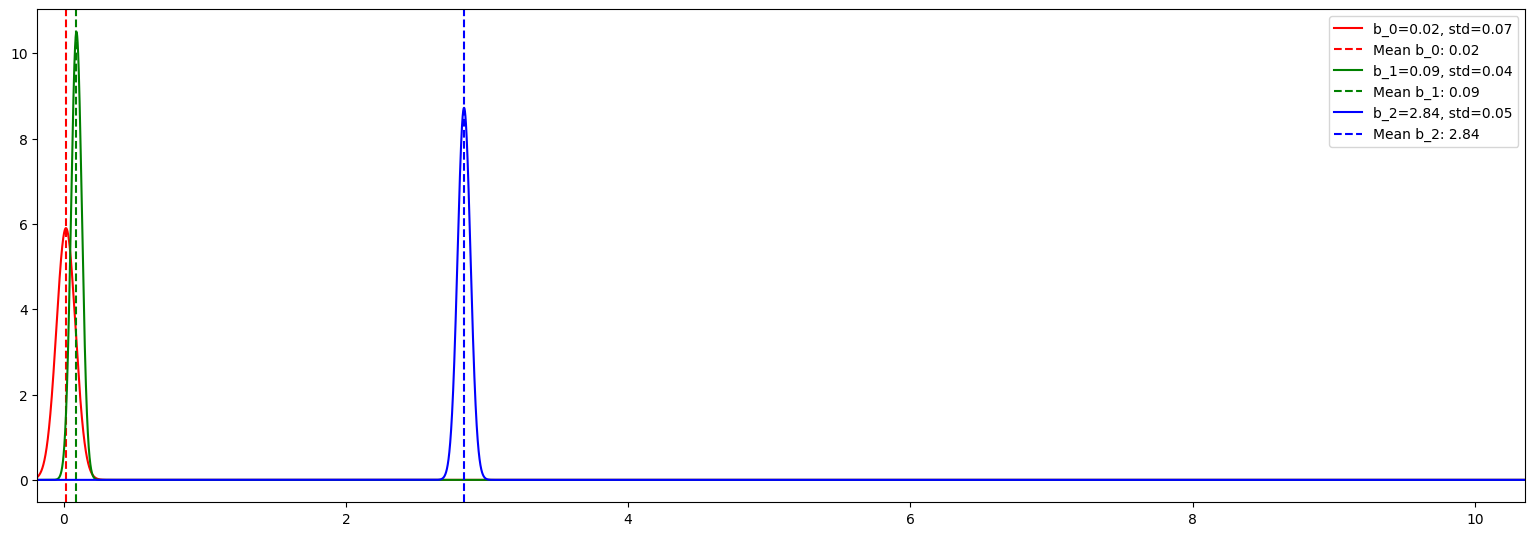

In [29]:
# Initializing values.
%config InlineBackend.print_figure_kwargs = {'bbox_inches': 'tight'}
colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'pink']
count = 0
# Getting the width of the current cell (in inches).
width_cell = plt.rcParams['figure.figsize'][0]
# X data
x = np.linspace(min(estimators) - 3 * max(desv), max(estimators) + 3 * max(desv), N)
for estimator, dev in zip(estimators, desv):
    y = norm.pdf(x, estimator, dev)
    # Probability density function.
    plt.plot(x, y, color=colors[count], label=f'b_{count}={estimator:.2f}, std={dev:.2f}')
    plt.axvline(x=estimator, color=colors[count], linestyle='--', label=f'Mean b_{count}: {estimator:.2f}')
    plt.gcf().set_size_inches(width_cell * 3, width_cell)
    count += 1
# Show plot.
plt.xlim(min(estimators) - 3 * max(desv), max(estimators) + 3 * max(desv))
plt.legend()
plt.show()

In [30]:
# Function to implement t-test.
def t_test(estimator, desv, n, len_d, alpha=0.05, two_sided=True):
    """
        t-test.
        Arguments:
            estimators: a float value.
            desvs: a float value.
            n: size of sample.
            len_d: a size of estimators.
            alpha: a float value.
            two_sided: a boolean value.
        Return:
            test: a boolean value.
            critical_value: a float value.
            t_i: a float value.
            dof: an integer value.
    """
    # Getting t
    t_i = estimator / desv
    # Degrees of freedom.
    dof = n - len_d - 1
    if two_sided:
        # Getting critical value.
        critical_value = t.ppf(1 - (alpha / 2), dof)
        test = np.abs(t_i) > critical_value
    else:
        # Getting critical value.
        critical_value = t.ppf(1 - alpha, dof)
        test = t > critical_value
        
    return [test, critical_value, t_i, dof]

In [31]:
# Getting t_test results.
n = len(X_train_scaled)
two_sided = True
t_test_result = [t_test(estimator, des, n, len(desv), two_sided=two_sided) for des, estimator in zip(desv, estimators)]
count = 0
for t_test_i in t_test_result:
    print(f'For feature {count}, Critical Value: {t_test_i[1]:.2f}, t value: {t_test_i[2]:25.2f}. Result test: {t_test_i[0]}')
    t_test_i.append(count)
    count += 1

For feature 0, Critical Value: 1.96, t value:                      0.23. Result test: False
For feature 1, Critical Value: 1.96, t value:                      2.38. Result test: True
For feature 2, Critical Value: 1.96, t value:                     62.04. Result test: True


c:\Users\Adolfo\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_continuous_distns.py:6703: RuntimeWarning: overflow encountered in power
  / (np.sqrt(df*np.pi)*(1+(x**2)/df)**((df+1)/2))
c:\Users\Adolfo\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_continuous_distns.py:6703: RuntimeWarning: overflow encountered in multiply
  / (np.sqrt(df*np.pi)*(1+(x**2)/df)**((df+1)/2))


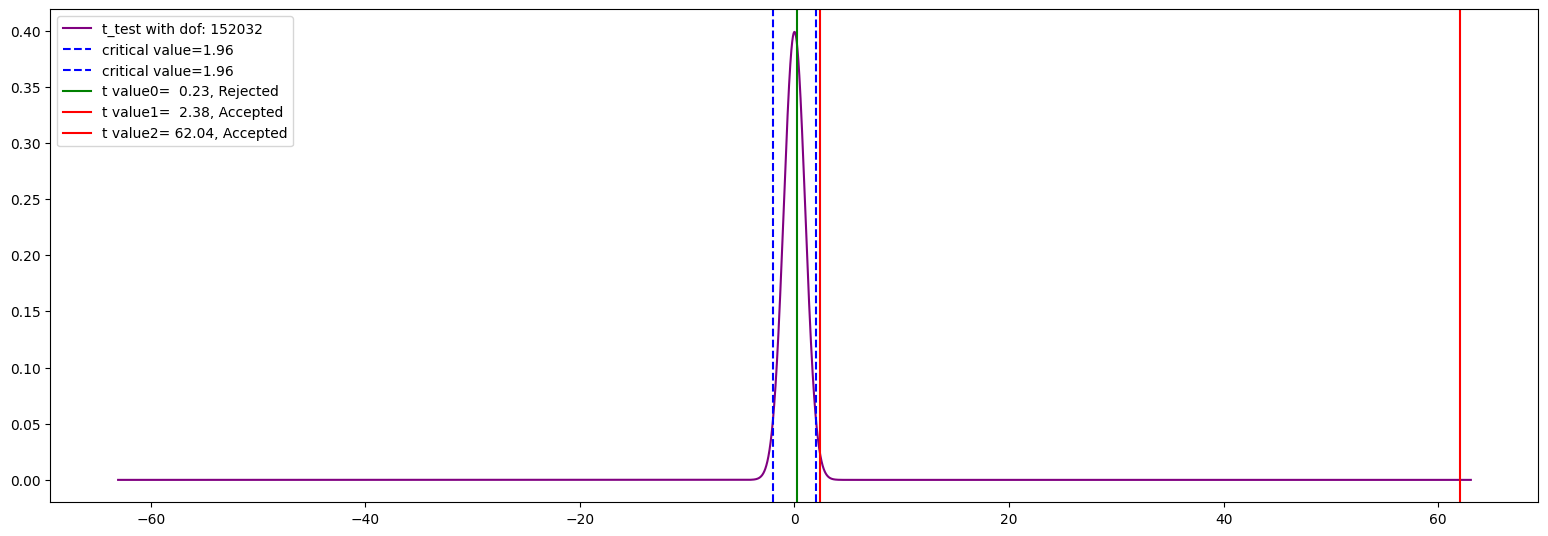

Considerations
For the last two feautes the t values are so big that it's not possible to show in the graph.
t value 1: 2.38, Accepted
t value 2: 62.04, Accepted


In [32]:
# Get min-max values.
t_i = [t_test_i[2] for t_test_i in t_test_result[:4]]
min_t = min(t_i)
max_t = max(t_i)
t_i = [[t_test_i[2], t_test_i[-1]] for t_test_i in t_test_result[:4]]
# Initializing values.
%config InlineBackend.print_figure_kwargs = {'bbox_inches': 'tight'}
cont = 0
# Getting the width of the current cell (in inches).
width_cell = plt.rcParams['figure.figsize'][0]
# X data
dof = t_test_result[0][-2]
x = np.linspace(-max_t - 1, max_t + 1, N)
y = t.pdf(x, dof)
# Probability density function.
plt.plot(x, y, color='purple', label=f't_test with dof: {dof}')
plt.axvline(x=t_test_result[0][1], color='blue', linestyle='--', label=f'critical value={t_test_result[0][1]:.2f}')
if two_sided:
    plt.axvline(x=-t_test_result[0][1], color='blue', linestyle='--', label=f'critical value={t_test_result[0][1]:.2f}')
for i in t_i:
    if i[0] > t_test_result[0][1] or i[0] < -t_test_result[0][1]:
        plt.axvline(i[0], color ='red', label=f't value{i[1]}={i[0]:6.2f}, Accepted')
    else:
        plt.axvline(i[0], color ='green', label=f't value{i[1]}={i[0]:6.2f}, Rejected')
plt.gcf().set_size_inches(width_cell * 3, width_cell)
# Show plot.
plt.legend()
plt.show()
# Considerations
print(f'Considerations')
print(f'For the last two feautes the t values are so big that it\'s not possible to show in the graph.')
last_features = t_test_result[-2:]
for feature in last_features:
    print(f't value {feature[-1]}: {feature[2]:.2f}, Accepted')